# Installing relevant packages

In [5]:
pip install scikit-learn

In [6]:
pip install numpy

In [7]:
pip install pandas

In [8]:
pip install nltk

In [9]:
pip install matplotlib

In [10]:
pip install imblearn

# Importing

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

# Loading Data

In [12]:
import pandas as pd

df = pd.read_csv('CyberTrollIEEE.csv')
df.head()

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


In [13]:
df.shape

(22141, 2)

# Visualization

<Axes: xlabel='annotation'>

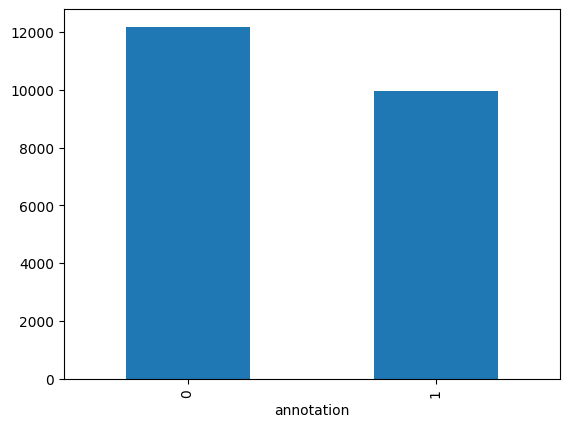

In [14]:
df['annotation'].value_counts().sort_index().plot.bar()

In [15]:
#Biasness
print("PosiNon cyber trollingtive: ", df.annotation.value_counts()[0]/len(df.annotation)*100,"%")
print("Cybertrolling: ", df.annotation.value_counts()[1]/len(df.annotation)*100,"%")

PosiNon cyber trollingtive:  55.00654893636241 %
Cybertrolling:  44.99345106363759 %


# Preprocessing

In [16]:
nltk.download('stopwords')
stop = stopwords.words('english')

regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df ['content_without_stopwords'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df ['content_without_puncs'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))
del df['content_without_stopwords']
del df['content']
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,annotation,content_without_puncs
0,1,Get fucking real dude
1,1,She dirty come crook Rengel Dems fucking corru...
2,1,fuck up I could day too Lets hour Ping later s...
3,1,Dude dont finish enclosing fucking showers I h...
4,1,WTF talking Men No men thats menage thats gay
...,...,...
22136,1,missmayim Jeopardy A travesty chose slut shami...
22137,1,waggykookie Theyre 11yo cursing slut shaming u...
22138,1,CynosureNikaaa Just need attention name slut s...
22139,1,Y’all hate slutshaming til oh okay


In [17]:
#Stemming
porter_stemmer = PorterStemmer()
#punctuations
nltk.download('punkt')
tok_list = []
size = df.shape[0]

for i in range(size):
  word_data = df['content_without_puncs'][i]
  nltk_tokens = nltk.word_tokenize(word_data)
  final = ''
  for w in nltk_tokens:
    final = final + ' ' + porter_stemmer.stem(w)
  tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_puncs']
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,annotation,content_tokenize
0,1,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay
...,...,...
22136,1,missmayim jeopardi a travesti chose slut sham...
22137,1,waggykooki theyr 11yo curs slut shame use wor...
22138,1,cynosurenikaaa just need attent name slut sha...
22139,1,y ’ all hate slutsham til oh okay


In [18]:
noNums = []
for i in range(len(df)):
  noNums.append(''.join([i for i in df['content_tokenize'][i] if not i.isdigit()]))

df['content'] = noNums
df

,annotation,content_tokenize,content
0,1,get fuck real dude,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay,wtf talk men no men that menag that gay
...,...,...,...
22136,1,missmayim jeopardi a travesti chose slut sham...,missmayim jeopardi a travesti chose slut sham...
22137,1,waggykooki theyr 11yo curs slut shame use wor...,waggykooki theyr yo curs slut shame use word ...
22138,1,cynosurenikaaa just need attent name slut sha...,cynosurenikaaa just need attent name slut sha...
22139,1,y ’ all hate slutsham til oh okay,y ’ all hate slutsham til oh okay


In [19]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())

In [20]:
print(tfIdf)

  (0, 4451)	0.5720836336773627
  (0, 14347)	0.6332631323620899
  (0, 5721)	0.33837477905192287
  (0, 5988)	0.3964853467292604
  (1, 10667)	0.14426458246311177
  (1, 10873)	0.1924021221413797
  (1, 14561)	0.3412174416277192
  (1, 11118)	0.1783382257814703
  (1, 9856)	0.26722833015432396
  (1, 3257)	0.33748047541573684
  (1, 3886)	0.36124613216368795
  (1, 14530)	0.3771437982078481
  (1, 3430)	0.3683946812363456
  (1, 3010)	0.2024956611808386
  (1, 4103)	0.296856897229544
  (1, 15467)	0.23400707842389432
  (1, 5721)	0.12764231272227095
  (2, 6872)	0.2575429869390749
  (2, 1836)	0.2841165081063839
  (2, 19066)	0.28853655591656985
  (2, 15147)	0.4141689402370865
  (2, 10443)	0.3062868527311274
  (2, 13457)	0.3843236436134605
  (2, 7213)	0.2810758808060799
  (2, 10591)	0.23989617113553288
  :	:
  (22137, 19280)	0.22471360682755695
  (22137, 10245)	0.15394665539009877
  (22137, 4922)	0.18919570813145348
  (22138, 15419)	0.448703702320872
  (22138, 540)	0.448703702320872
  (22138, 3571)	0.448

In [21]:
print(tfIdf.shape) # means total rows  20001 with 14783 features

(22141, 19467)


In [22]:
df2 = pd.DataFrame(tfIdf[2].T.todense(), index=tfIdfVectorizer.vocabulary_.keys(), columns=["TF-IDF"])
df2 = df2.sort_values('TF-IDF', ascending=False)
print(df2.head(10))

                     TF-IDF
httpstcoqkxnbvsoa  0.414169
toetag             0.384324
eight              0.306287
stylishli          0.288537
stori              0.284117
httptinyurlcomjrc  0.281076
hahahahahlollol    0.257543
spoon              0.239896
bxngtxnrecord      0.238783
strang             0.223260


In [23]:
dfx = pd.DataFrame(tfIdf.toarray(), columns = tfIdfVectorizer.vocabulary_.keys())
print(dfx)

       get  fuck  real  dude  she  dirti  come  crook  rengel  dem  ...  \
0      0.0   0.0   0.0   0.0  0.0    0.0   0.0    0.0     0.0  0.0  ...   
1      0.0   0.0   0.0   0.0  0.0    0.0   0.0    0.0     0.0  0.0  ...   
2      0.0   0.0   0.0   0.0  0.0    0.0   0.0    0.0     0.0  0.0  ...   
3      0.0   0.0   0.0   0.0  0.0    0.0   0.0    0.0     0.0  0.0  ...   
4      0.0   0.0   0.0   0.0  0.0    0.0   0.0    0.0     0.0  0.0  ...   
...    ...   ...   ...   ...  ...    ...   ...    ...     ...  ...  ...   
22136  0.0   0.0   0.0   0.0  0.0    0.0   0.0    0.0     0.0  0.0  ...   
22137  0.0   0.0   0.0   0.0  0.0    0.0   0.0    0.0     0.0  0.0  ...   
22138  0.0   0.0   0.0   0.0  0.0    0.0   0.0    0.0     0.0  0.0  ...   
22139  0.0   0.0   0.0   0.0  0.0    0.0   0.0    0.0     0.0  0.0  ...   
22140  0.0   0.0   0.0   0.0  0.0    0.0   0.0    0.0     0.0  0.0  ...   

       apartheid  zionist  ins  httpstcoquejnkv  waggykooki  \
0            0.0      0.0  0.0      

In [24]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.vocabulary_.keys(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i=0
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))
        i = i+1
        if (i > 25):
          break

In [25]:
#top 25 words
display_scores(tfIdfVectorizer, tfIdf)

utak                                               Score: 550.1709005765165
dough                                              Score: 518.7466163994625
ri                                                 Score: 494.96765468221776
httpstcobqprikfxj                                  Score: 415.3710347794626
gaidamn                                            Score: 346.13446739314924
shoobadoop                                         Score: 327.95236329945254
metalbristl                                        Score: 308.10675841362456
kung                                               Score: 307.20241513151205
straw                                              Score: 306.33733407373074
ragnarutd                                          Score: 302.0484543107161
tenement                                           Score: 276.2853449948321
stabl                                              Score: 268.51985944639944
zainydammi                                         Score: 231.2309021067065
shall

In [26]:
X=tfIdf.toarray()
y = np.array(df.annotation.tolist())
#Spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17712, 19467)
(17712,)
(4429, 19467)
(4429,)


In [27]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9728 7984]]


In [28]:
#Test Data
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [2451 1978]]


In [29]:
#Random oversampling on training data
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [30]:
print(X_over.shape)
print(y_over.shape)

(19456, 19467)
(19456,)


In [31]:
unique_elements, counts_elements = np.unique(y_over, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9728 9728]]


# Training and Calculating Scores

In [32]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def getStatsFromModel(model):
    print(classification_report(y_test, y_pred))

    # Get predicted probabilities or scores
    y_score = model.predict_proba(X_test)[:, 1]

    # Calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    # Plot precision-recall curve
    plt.figure()
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('2-class Precision-Recall curve')

    # Calculate ROC AUC
    logit_roc_auc = roc_auc_score(y_test, y_score)

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    plt.figure()
    plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

## Normal Methods

Score: 0.6229397155114021
Confusion Matrix: 
 [[ 857 1594]
 [  76 1902]]
              precision    recall  f1-score   support

           0       0.92      0.35      0.51      2451
           1       0.54      0.96      0.69      1978

    accuracy                           0.62      4429
   macro avg       0.73      0.66      0.60      4429
weighted avg       0.75      0.62      0.59      4429



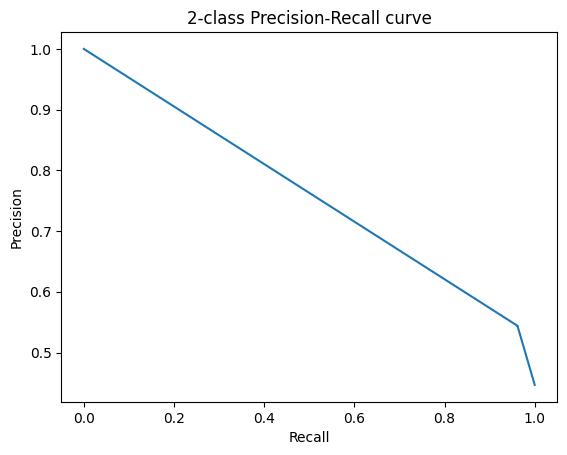

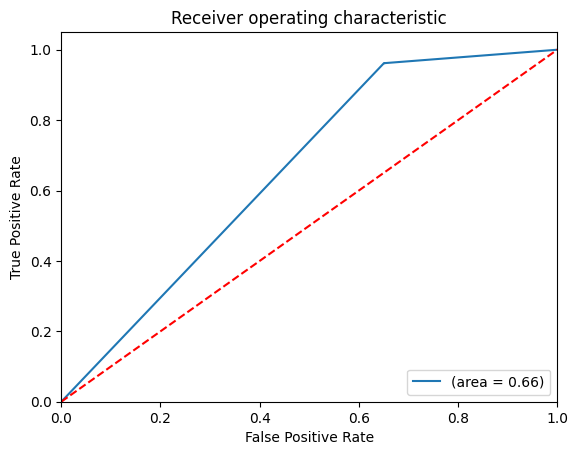

In [33]:
#Supervised Methods
# 3 normal methods
# 2 ensemble methods
gnb = GaussianNB()
gnbmodel = gnb.fit(X_over, y_over)
y_pred = gnbmodel.predict(X_test)
print ("Score:", gnbmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(gnb)

Accuracy:  0.7909234590200949
Confusion Matrix: 
 [[1954  497]
 [ 429 1549]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2451
           1       0.76      0.78      0.77      1978

    accuracy                           0.79      4429
   macro avg       0.79      0.79      0.79      4429
weighted avg       0.79      0.79      0.79      4429



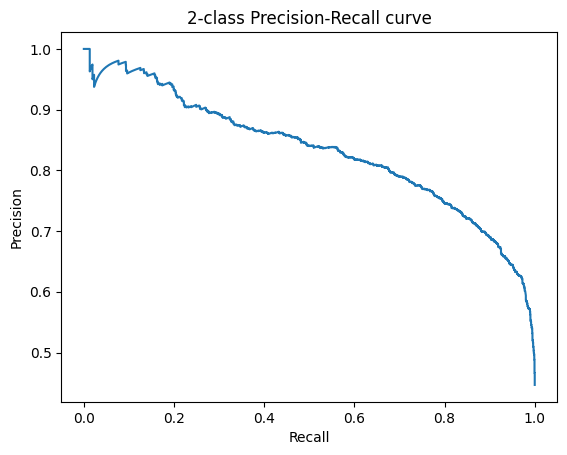

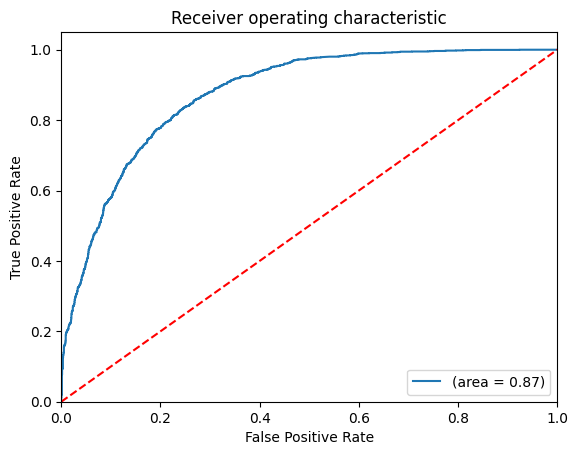

In [34]:
lgr = LogisticRegression()
lgr.fit(X_over, y_over)
y_pred = lgr.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(lgr)

Accuracy:  0.776021675321743
Confusion Matrix: 
 [[1919  532]
 [ 460 1518]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2451
           1       0.74      0.77      0.75      1978

    accuracy                           0.78      4429
   macro avg       0.77      0.78      0.77      4429
weighted avg       0.78      0.78      0.78      4429



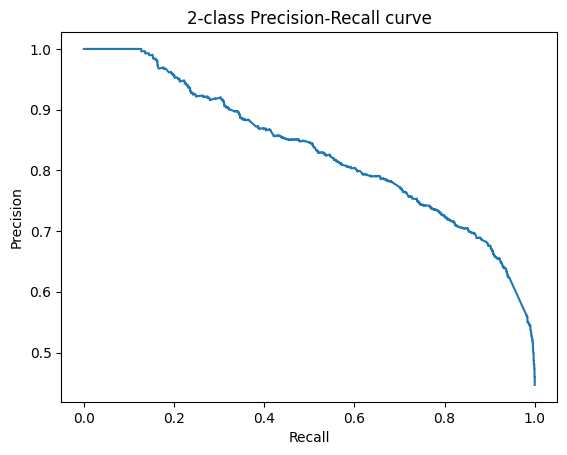

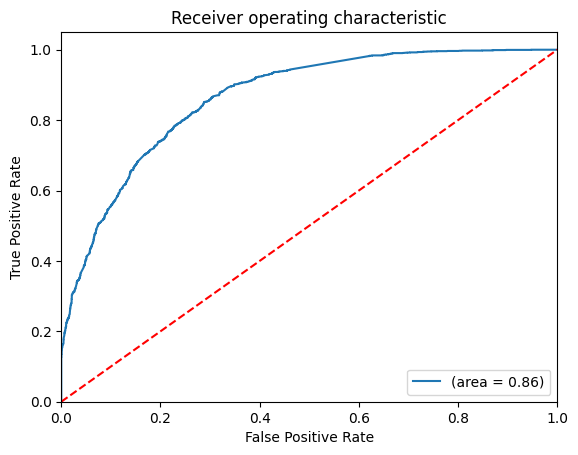

In [35]:
xgb = XGBClassifier()
xgb_model = xgb.fit(X_over, y_over)
y_pred = xgb_model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

# Generate and plot additional metrics
getStatsFromModel(xgb_model)

## Ensemble Methods

Accuracy:  0.7116730638970422
Confusion Matrix: 
 [[1809  642]
 [ 635 1343]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2451
           1       0.68      0.68      0.68      1978

    accuracy                           0.71      4429
   macro avg       0.71      0.71      0.71      4429
weighted avg       0.71      0.71      0.71      4429



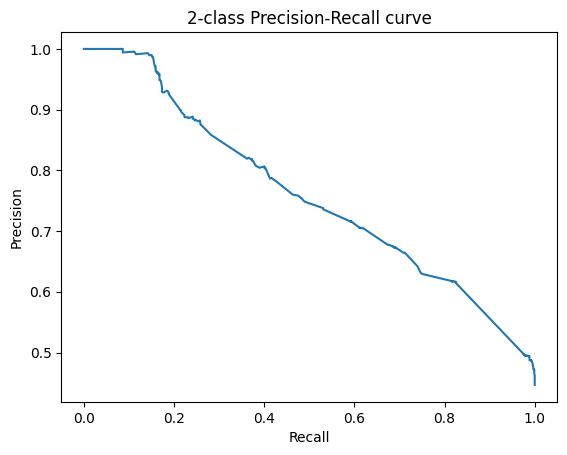

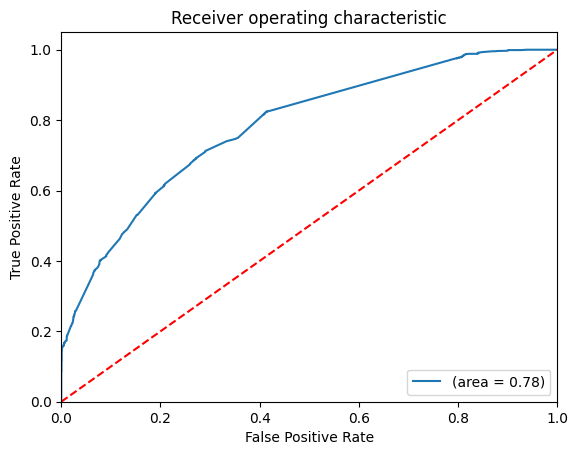

In [36]:
#Ensemble methods from here
abc = AdaBoostClassifier()
abc.fit(X_over, y_over)
y_pred = abc.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(abc)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  4.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s


Score: 0.902461052156243
Confusion Matrix: 
 [[2167  284]
 [ 148 1830]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2451
           1       0.87      0.93      0.89      1978

    accuracy                           0.90      4429
   macro avg       0.90      0.90      0.90      4429
weighted avg       0.90      0.90      0.90      4429



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s


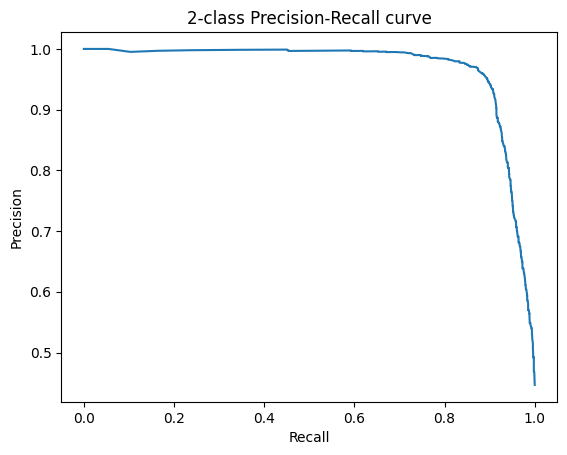

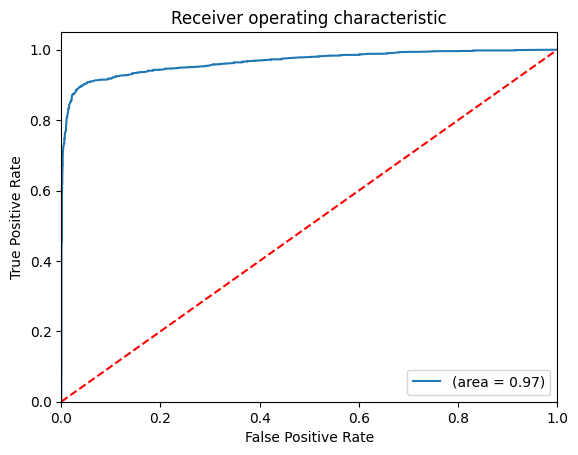

In [37]:
rfc = RandomForestClassifier(verbose=True) #uses randomized decision trees
rfcmodel = rfc.fit(X_over, y_over)
y_pred = rfc.predict(X_test)
print ("Score:", rfcmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(rfc)

## Requires High RAM and processing time - Not used

In [38]:
# Model, SVM
# from sklearn import svm


# clf = svm.SVC(kernel='linear', verbose=True)
# clf.fit(X_over, y_over)
# y_pred = clf.predict(X_test)
# print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
# print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
# getStatsFromModel(clf)

In [39]:
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,10), max_iter=200, verbose=True)
# mlp.fit(X_over,y_over)
# print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
# getStatsFromModel(mlp)